In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from scipy.stats.kde import gaussian_kde
import scipy.signal as signal
%matplotlib inline
from IPython.html import widgets
from IPython.html.widgets import interact,fixed

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
execfile('/notebooks/assay-explorer/src/display_utils.py')

In [3]:
filepath = '/notebooks/moldev-data/analyzed/07-20-2015/ssC-cells.csv'
cells = pd.read_csv(filepath)

In [4]:
# [Float] -> Float
def get_threshold(intensity,bw = 0.35):
    """ Given an array of intensities, find the intensity 
        threshold separating the G1 peak from the S/G2 peak. """
    kde_fit = gaussian_kde(intensity,bw)
    x = np.linspace(min(intensity),
                    max(intensity),
                    1000)
    y = kde_fit(x)
    ddx = np.diff(np.diff(y)) # second derivative of fit
    peak = np.argmin(ddx) # most frequent intensity 
    index = min([yi for yi in signal.argrelmax(ddx)[0] if yi > peak])
    threshold = x[index]
    return threshold

In [5]:
# [Num] -> Float -> SideEffect[Plot]
def plot_gaussian_kde(X,bw):
    kde_fit = gaussian_kde(X,bw)
    x = np.linspace(min(X),
                    max(X),
                    1000)
    y = kde_fit(x)
    plt.plot(x,y)

In [6]:
def determine_thresholding_parameters \
(data,condition_number,display_bw,threshold_bw):
    condition = data['Condition'].unique().tolist()[condition_number]
    intensities = data[data['Condition'] == condition]['NucIntegrated Intensity_Avg']
    
#     cell_type = condition.split()[-1]
#     data['Cell Type'] = data['Condition'].map(lambda x: x.split()[-1])
#     cell_type_threshold = get_threshold(data[data['Cell Type'] == cell_type]['NucIntegrated Intensity_Avg'],threshold_bw)
    
    threshold = get_threshold(intensities,threshold_bw)
    plot_gaussian_kde(intensities,display_bw)
    plt.title(condition)
    plt.xlim(0,1.5e8)
    plt.ylim(0,5.5e-8)
    plt.xlabel('NucIntegrated Intensity_Avg')
    plt.plot([threshold,threshold],plt.gca().get_ylim(),color='r')
#     plt.plot([cell_type_threshold,cell_type_threshold],plt.gca().get_ylim(),color='k')
#     print "Threshold = {}".format(threshold)

# Cell Phase Separation
To find the intensity value that separates G1 from S/G2 cells, I plot the distribution of `NucIntegrated Intensity_Avg`, then smooth it out. 

In the plot below, there are three sliders. 
1. Condition - check out different conditions 
2. Display_bw - smooth out the plot (doesn't affect the calculation of the threshold)
3. Threshold_vw - smooth out the distribution for the calculation. 

Set the display_bw and threshold_bw to the same value to 'see what the computer sees' when it chooses a threshold.

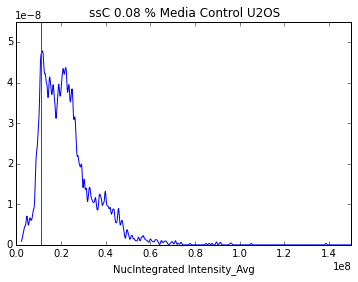

In [7]:
n_conditions = len(cells['Condition'].unique())
bw = {'min':0.025, 'max': 0.8, 'step':0.025}

interact(
    determine_thresholding_parameters,
    data = fixed(cells),
    condition_number = widgets.IntSlider(min=0,max = n_conditions - 1),
    display_bw = widgets.FloatSlider(min = bw['min'], max = bw['max'], step = bw['step']),
    threshold_bw = widgets.FloatSlider(min = bw['min'], max = bw['max'], step = bw['step']));